# Data analysis and preprocessing

Original dataset: https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler

In [2]:
df = pd.read_csv("SpotifyFeatures.csv")
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [4]:
df["track_id"].nunique()

176774

We have 176774 unique track_id values but 232725 entries which means some of the entries are duplicates so they will be dropped.  
First we check if they are really the same songs.

In [5]:
duplicates = df[df.duplicated(subset='track_id', keep=False)].sort_values(by='track_id', ascending=True)
duplicates.head(20)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
14492,Dance,ZAYN,Still Got Time,000xQL6tZNLJzIrtIgxqSl,70,0.13100,0.748,188491,0.6270,0.000000,G,0.0852,-6.029,Major,0.0644,120.963,4/4,0.5240
110840,Pop,ZAYN,Still Got Time,000xQL6tZNLJzIrtIgxqSl,70,0.13100,0.748,188491,0.6270,0.000000,G,0.0852,-6.029,Major,0.0644,120.963,4/4,0.5240
96926,Children’s Music,Young Tribe,Kingdom,001gDjxhKGDSx4sMMAgS9R,57,0.03490,0.564,211789,0.8080,0.000360,C#,0.3260,-5.825,Major,0.0481,78.439,4/4,0.3650
153533,Rock,Young Tribe,Kingdom,001gDjxhKGDSx4sMMAgS9R,58,0.03490,0.564,211789,0.8080,0.000360,C#,0.3260,-5.825,Major,0.0481,78.439,4/4,0.3650
65253,Folk,Alabama Shakes,Gemini,001ifh9Zkyc5DhK7AGQRtK,42,0.44700,0.411,395573,0.4220,0.121000,E,0.0742,-5.475,Minor,0.0459,147.465,1/4,0.3460
145387,Indie,Alabama Shakes,Gemini,001ifh9Zkyc5DhK7AGQRtK,42,0.44700,0.411,395573,0.4220,0.121000,E,0.0742,-5.475,Minor,0.0459,147.465,1/4,0.3460
201614,Soundtrack,Alan Menken,Jasmine Runs Away,002PgfoyfrOGiKch4EW8Wm,33,0.98500,0.199,46867,0.0376,0.628000,G#,0.1150,-31.142,Major,0.0457,68.167,4/4,0.0891
182413,Movie,Alan Menken,Jasmine Runs Away,002PgfoyfrOGiKch4EW8Wm,33,0.98500,0.199,46867,0.0376,0.628000,G#,0.1150,-31.142,Major,0.0457,68.167,4/4,0.0891
121130,Rap,Young Dolph,Still Smell Like It,002QT7AS6h1LAF5dla8D92,50,0.04690,0.830,207827,0.6530,0.000000,C#,0.1120,-5.298,Major,0.1850,123.032,4/4,0.2280
90714,Hip-Hop,Young Dolph,Still Smell Like It,002QT7AS6h1LAF5dla8D92,50,0.04690,0.830,207827,0.6530,0.000000,C#,0.1120,-5.298,Major,0.1850,123.032,4/4,0.2280


We can see they are indeed the same tracks that got assigned a different genre and sometimes a slightly different popularity score. Assuming both genres are correct we will keep the entry with higher popularity score, or if equal the first occurence in the dataset.

In [6]:
df = df.sort_values(by='popularity', ascending=False).drop_duplicates(subset='track_id', keep='first')

df['track_id'].nunique()

176774

In [7]:
len(df)

176774

Now we drop columns "artist_name", "track_name", "track_id" because they are not relevant in danceability prediction.

In [8]:
df = df.drop(["artist_name", "track_name", "track_id"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176774 entries, 9027 to 0
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             176774 non-null  object 
 1   popularity        176774 non-null  int64  
 2   acousticness      176774 non-null  float64
 3   danceability      176774 non-null  float64
 4   duration_ms       176774 non-null  int64  
 5   energy            176774 non-null  float64
 6   instrumentalness  176774 non-null  float64
 7   key               176774 non-null  object 
 8   liveness          176774 non-null  float64
 9   loudness          176774 non-null  float64
 10  mode              176774 non-null  object 
 11  speechiness       176774 non-null  float64
 12  tempo             176774 non-null  float64
 13  time_signature    176774 non-null  object 
 14  valence           176774 non-null  float64
dtypes: float64(9), int64(2), object(4)
memory usage: 21.6+ MB


Checking for missing values:

In [9]:
df.isnull().sum()

genre               0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

There are no missing values in the dataset.

### Distribution analysis

In [10]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,176774.000000,176774.000000,176774.000000,1.767740e+05,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000,176774.000000
mean,36.517949,0.404135,0.541068,2.361272e+05,0.557025,0.172073,0.224531,-10.137593,0.127395,117.203680,0.451595
std,17.588018,0.366302,0.190387,1.305132e+05,0.275839,0.322936,0.211027,6.395559,0.204345,31.325092,0.267820
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,25.000000,0.045600,0.415000,1.782530e+05,0.344000,0.000000,0.097500,-12.851000,0.036800,92.006000,0.222000
50%,37.000000,0.288000,0.558000,2.194530e+05,0.592000,0.000070,0.130000,-8.191000,0.049400,115.006500,0.440000
75%,49.000000,0.791000,0.683000,2.685470e+05,0.789000,0.090800,0.277000,-5.631000,0.102000,138.799750,0.667000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


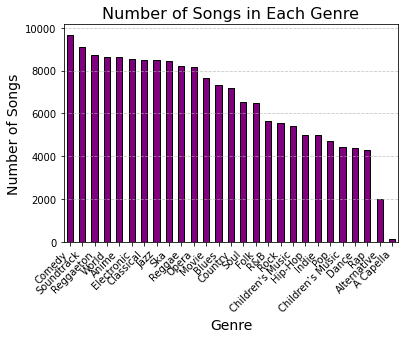

In [11]:
genre_counts = df['genre'].value_counts()

plt.figure()
genre_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Number of Songs in Each Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Songs', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

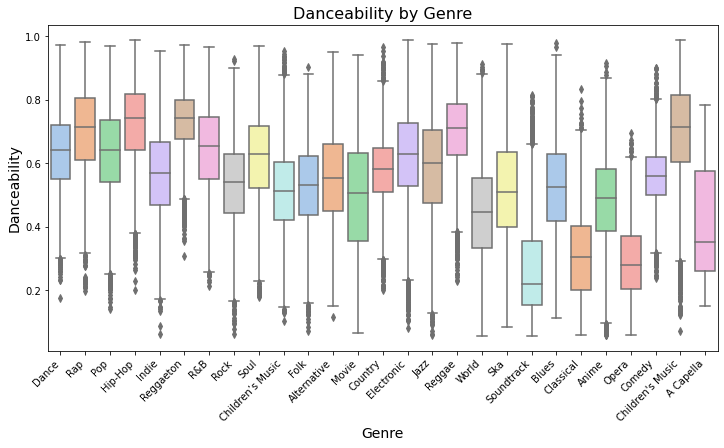

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='genre', y='danceability', palette='pastel')

plt.title('Danceability by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Danceability', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

Songs that belong to certain genres are less danceable on average like "Soundtrack", "Classical" and "Opera" which makes sense.

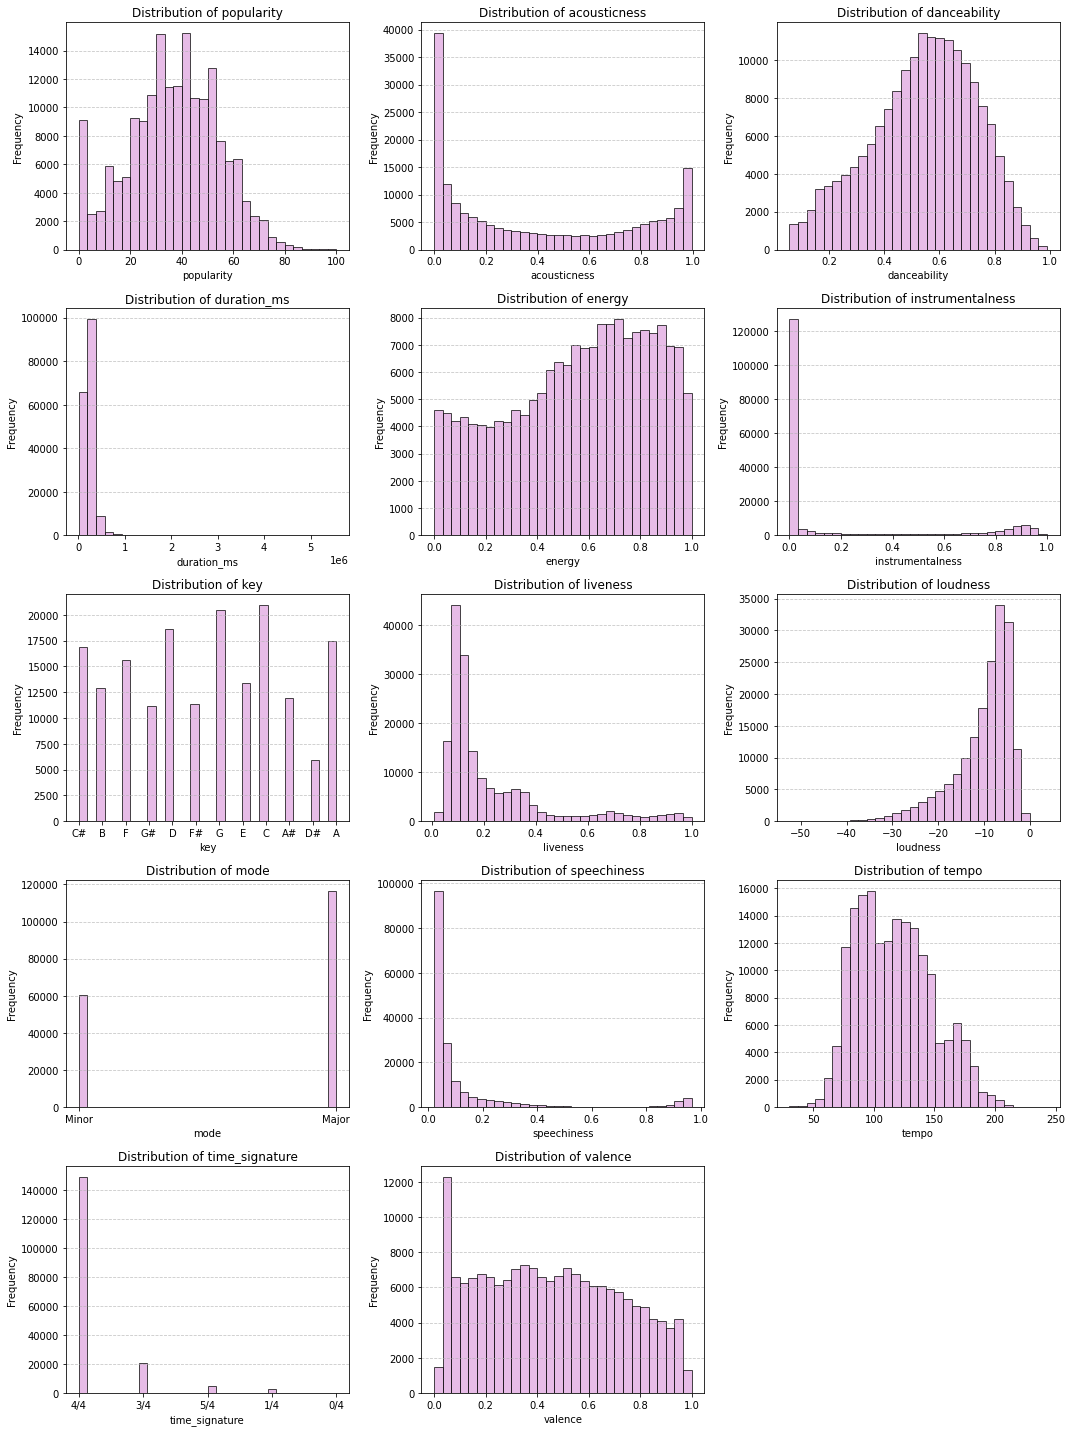

In [13]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']

for ax, feature in zip(axes.flat, features):
    ax.hist(df[feature], bins=30, color='plum', edgecolor='black', alpha=0.7)
    ax.set_title(f"Distribution of {feature}", fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel("Frequency", fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

for ax in axes.flat[len(features):]:
    ax.axis('off')  # Hide unused subplot

plt.tight_layout()
plt.show()

By researching optimal tempo for dancing we found that usually it falls into 90-130BPM range. We tested if tracks in that range have higher danceability scores than ranges lower and higher of that. That is why we encoded tempo into Slow (0-90 BPM), Optimal (90-130) and Fast (130-250) categories and compared average danceability scores to see if there indeed is a difference.

Optimal    78727
Fast       58532
Slow       39515
Name: tempo_category, dtype: int64


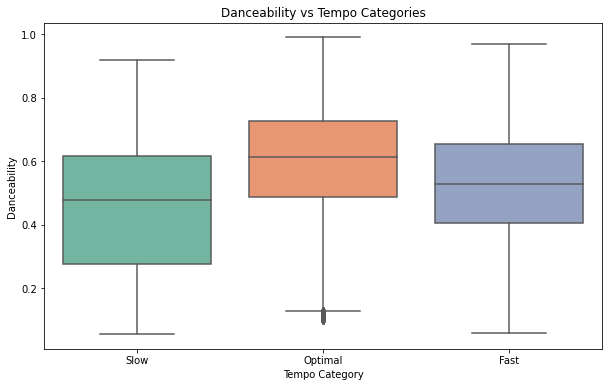

tempo_category
Slow       0.453830
Optimal    0.596264
Fast       0.525722
Name: danceability, dtype: float64


In [14]:
bins = [0, 90, 130, 250]
labels = ['Slow', 'Optimal', 'Fast']
df['tempo_category'] = pd.cut(df['tempo'], bins=bins, labels=labels, include_lowest=True)

print(df['tempo_category'].value_counts())

plt.figure(figsize=(10, 6))
sns.boxplot(x='tempo_category', y='danceability', data=df, palette='Set2')
plt.title('Danceability vs Tempo Categories')
plt.xlabel('Tempo Category')
plt.ylabel('Danceability')
plt.show()

avg_danceability = df.groupby('tempo_category')['danceability'].mean()
print(avg_danceability)

There is a difference in the averages among the tempo categories, with optimal class having the higher average danceability than the other to groups, but whiskers of box plot show a lot of overlapping among the categories so we won't do tempo binning.

In [15]:
df.drop('tempo_category', axis=1, inplace=True)

In [16]:
cols = ['tempo', 'popularity']
scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])

In [17]:
cols = ['loudness', 'instrumentalness', 'speechiness']
scaler = RobustScaler()
df[cols] = scaler.fit_transform(df[cols])

### Correlation analysis

<AxesSubplot:>

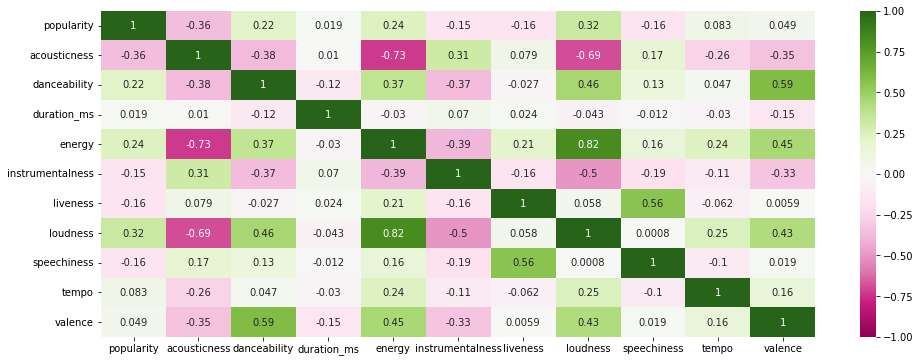

In [18]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="PiYG")

Darker greens and pinks indicate stronger correlation. Green indicates positive and pink indicates negative correlation. Danceability has positive correlation with valence, loudness and energy and negative correlation with instrumentalness and acousticness.

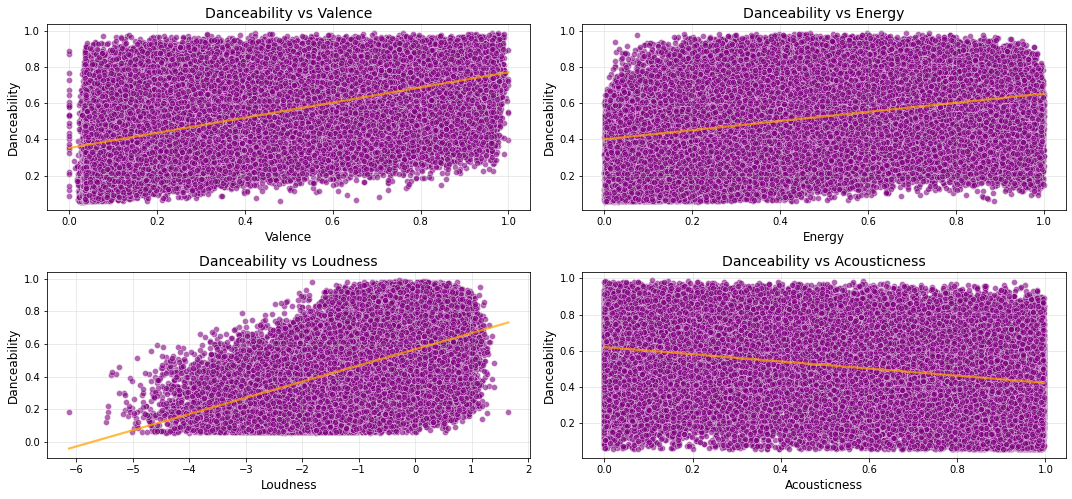

In [19]:
features = ['valence', 'energy', 'loudness', 'acousticness']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, start=1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=df, x=feature, y='danceability', alpha=0.6, color='purple')
    sns.regplot(data=df, x=feature, y='danceability', scatter=False, color='orange', line_kws={"alpha": 0.7})
    plt.title(f'Danceability vs {feature.capitalize()}', fontsize=14)
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel('Danceability', fontsize=12)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Valence seems to positively influence danceability as well as loudness, energy has a bit of a weaker influence but it is still positive and that follows our inital hypothesis. Acousticness seems to have negative influencevon danceability prediction.

### Encoding

In [20]:
df['genre'].unique()

array(['Dance', 'Rap', 'Pop', 'Hip-Hop', 'Indie', 'Reggaeton', 'R&B',
       'Rock', 'Soul', 'Children’s Music', 'Folk', 'Alternative', 'Movie',
       'Country', 'Electronic', 'Jazz', 'Reggae', 'World', 'Ska',
       'Soundtrack', 'Blues', 'Classical', 'Anime', 'Opera', 'Comedy',
       "Children's Music", 'A Capella'], dtype=object)

There are two genres called Children's Music. Let's standardize them.

In [21]:
len(df[df['genre'] == 'Children’s Music'])

4427

In [22]:
len(df[df['genre'] == "Children's Music"])

5402

In [23]:
df['genre'] = df['genre'].apply(lambda x:"Children's Music" if x == 'Children’s Music' else x)

In [24]:
df['genre'].unique()

array(['Dance', 'Rap', 'Pop', 'Hip-Hop', 'Indie', 'Reggaeton', 'R&B',
       'Rock', 'Soul', "Children's Music", 'Folk', 'Alternative', 'Movie',
       'Country', 'Electronic', 'Jazz', 'Reggae', 'World', 'Ska',
       'Soundtrack', 'Blues', 'Classical', 'Anime', 'Opera', 'Comedy',
       'A Capella'], dtype=object)

In [25]:
df['time_signature'].unique()

array(['4/4', '3/4', '5/4', '1/4', '0/4'], dtype=object)

In [26]:
df['key'].unique()

array(['C#', 'B', 'F', 'G#', 'D', 'F#', 'G', 'E', 'C', 'A#', 'D#', 'A'],
      dtype=object)

In [27]:
df['mode'].unique()

array(['Minor', 'Major'], dtype=object)

Genre, time_signature, key and mode are categorical variables.  
Key is an ordered categorical variable as it can be organized in a circle of fifths. That means that from C Major, proceeding clockwise, the pitches ascend by fifths.  That is why ordinal encoding was used.  
For genre and time_signature we used OneHot Encoder.  
For mode binary encoding was used since it has only two possible values: major and minor.

In [28]:
df['mode'] = df['mode'].map({'Minor': 0, 'Major': 1})

In [29]:
key_mapping = {
    'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5,
    'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11
}
df['key'] = df['key'].map(key_mapping)

In [30]:
ohc = OneHotEncoder(sparse_output=False, drop='first')

cols = ['time_signature', 'genre']

encoded_array = ohc.fit_transform(df[cols])

encoded_columns = ohc.get_feature_names_out(cols)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns, index=df.index)

df= pd.concat([df.drop(columns=cols), encoded_df], axis=1)

df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World
9027,1.00,0.5780,0.725,178640,0.321,-0.000775,1,0.0884,-0.353601,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86951,0.99,0.1630,0.833,149520,0.539,-0.000752,11,0.1010,0.109695,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107802,0.99,0.0421,0.726,190440,0.554,-0.000775,5,0.1060,0.401801,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66643,0.98,0.1100,0.737,193227,0.860,-0.000754,8,0.0574,0.767175,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107829,0.97,0.0691,0.719,187436,0.704,-0.000775,1,0.1660,0.480194,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df = df.reset_index(drop=True)

In [32]:
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Reggaeton,genre_Rock,genre_Ska,genre_Soul,genre_Soundtrack,genre_World
0,1.00,0.5780,0.725,178640,0.321,-0.000775,1,0.0884,-0.353601,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.99,0.1630,0.833,149520,0.539,-0.000752,11,0.1010,0.109695,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.99,0.0421,0.726,190440,0.554,-0.000775,5,0.1060,0.401801,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.98,0.1100,0.737,193227,0.860,-0.000754,8,0.0574,0.767175,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.97,0.0691,0.719,187436,0.704,-0.000775,1,0.1660,0.480194,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176774 entries, 0 to 176773
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   popularity              176774 non-null  float64
 1   acousticness            176774 non-null  float64
 2   danceability            176774 non-null  float64
 3   duration_ms             176774 non-null  int64  
 4   energy                  176774 non-null  float64
 5   instrumentalness        176774 non-null  float64
 6   key                     176774 non-null  int64  
 7   liveness                176774 non-null  float64
 8   loudness                176774 non-null  float64
 9   mode                    176774 non-null  int64  
 10  speechiness             176774 non-null  float64
 11  tempo                   176774 non-null  float64
 12  valence                 176774 non-null  float64
 13  time_signature_1/4      176774 non-null  float64
 14  time_signature_3/4  

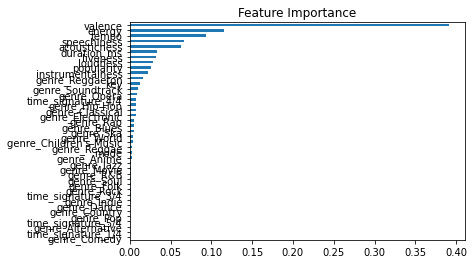

In [34]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['danceability'])
y = df['danceability']

model = RandomForestRegressor()
model.fit(X, y)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

Our initial feature importance analysis gives us valence, energy, tempo, speechiness and acousticness as the strongest 5 features which intuitively makes sense. Valence is by far the strongest predictor for now which was also indicated in correlation analysis.

In [35]:
df.to_csv("clean_data_v2.csv", index=False)

# Model comparison

Here we will try out 4 different regression models: Linear Regression, Decision Tree, Random Forest and XGBoost.  
They will be compared using following metrics:  
    - Mean Squared Error (MSE)  
    - Root Mean Squared Error (RMSE)  
    - R² Score  
    - Adjusted R² Score

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [37]:
def adjusted_r2_score(y_true, y_pred, X):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    p = X.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [38]:
df = pd.read_csv('clean_data_v2.csv')

target = 'danceability'
X = df.drop(columns=[target])
y = df[target]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 106064 samples
Validation set: 35355 samples
Test set: 35355 samples


In [39]:
# Cell 2: Model Training and Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import joblib

# Define models and hyperparameters
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [5, 10, 15],
            'min_samples_split': [2, 10],
            'min_samples_leaf': [1, 5]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20],
            'min_samples_split': [2, 10],
            'min_samples_leaf': [1, 5]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse'),
        'params': {
            'n_estimators': [100, 500],
            'max_depth': [3, 6],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8],
            'colsample_bytree': [0.8],
            'gamma': [0, 0.1],
            'min_child_weight': [1]
        }
    }
}

# Train, optimize, and evaluate models
results = []
for name, config in models.items():
    print(f"\nTraining {name}...")
    model = config['model']
    params = config['params']

    # Optimize hyperparameters
    if params and name != 'Random Forest':
        search = RandomizedSearchCV(model, params, n_iter=50, scoring='neg_mean_squared_error', cv=3, random_state=42, n_jobs=-1)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
        print(f"Best parameters for {name}: {search.best_params_}")
    else:
        model.fit(X_train, y_train)
        best_model = model

    y_val_pred = best_model.predict(X_val)
    y_test_pred = best_model.predict(X_test)
    val_mse = mean_squared_error(y_val, y_val_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    test_adj_r2 = adjusted_r2_score(y_test, y_test_pred, X_test)

    results.append({
        'Model': name,
        'Validation MSE': val_mse,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test R^2': test_r2,
        'Test Adjusted R^2': test_adj_r2
    })

    joblib.dump(best_model, f'{name.replace(" ", "_").lower()}_model.pkl')

results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)


Training Linear Regression...

Training Decision Tree...
Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 10}

Training Random Forest...

Training XGBoost...
Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}

Model Comparison:
               Model  Validation MSE  Test MSE  Test RMSE  Test R^2  \
0  Linear Regression        0.013853  0.014156   0.118978  0.608742   
1      Decision Tree        0.013258  0.013449   0.115970  0.628273   
2      Random Forest        0.009543  0.009703   0.098505  0.731808   
3            XGBoost        0.008598  0.008685   0.093194  0.759949   

   Test Adjusted R^2  
0           0.608288  
1           0.627842  
2           0.731497  
3           0.759671  


XGBoost gave the best results so we choose this model for danceability prediction.

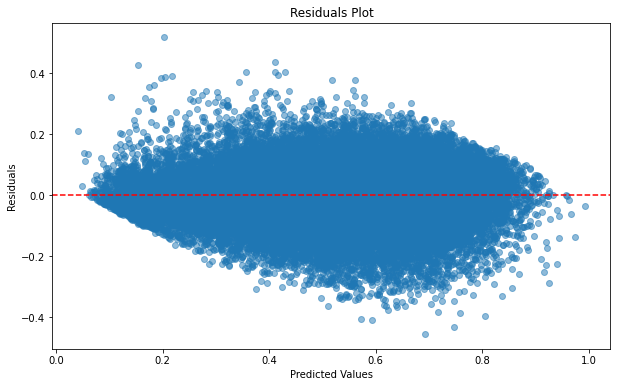

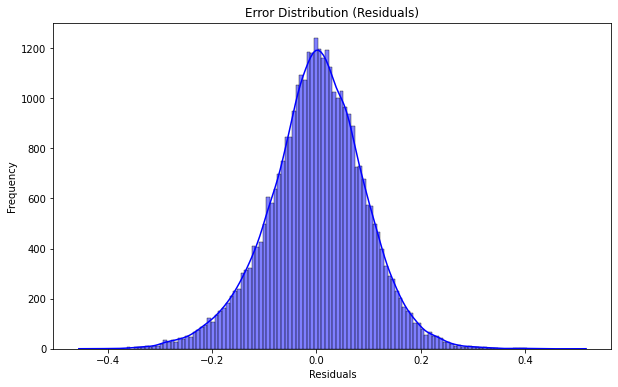

<Figure size 720x432 with 0 Axes>

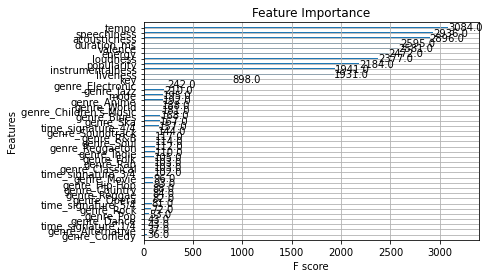


Cross-Validation MSE Scores: [0.00871286 0.00869737 0.0088403  0.0085832  0.00872068]
Average Cross-Validation MSE: 0.008710884182212714


In [40]:
import joblib
xgb_model = joblib.load('xgboost_model.pkl')

y_pred = xgb_model.predict(X_test)

plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.title('Error Distribution (Residuals)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

from xgboost import plot_importance
plt.figure(figsize=(10,6))
plot_importance(xgb_model)
plt.title('Feature Importance')
plt.show()

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores

print("\nCross-Validation MSE Scores:", cv_mse)
print("Average Cross-Validation MSE:", cv_mse.mean())


Based on given plots we conclude that the model is not overfitting as the error distribution is normal and cross validation shows consistency in MSE score along samples.

Next we wanted to improve interpretability of our model. It is easier to understand what it means if a song has high/low/medium danceability than to understand it has a danceability score of e.g. 0.43. That is why we split danceability into the three categories mentioned above. Threshold was decided using domain knowledge and common sense. We decided on:  
Low: 0-0.45  
Medium: 0.46-0.65  
High: 0.66-1  

In [41]:
thresholds = [0.0, 0.45, 0.65, 1.0]
df['danceability_class'] = pd.cut(
    df['danceability'], bins=thresholds, labels=['Low', 'Medium', 'High'], include_lowest=True
)

target = df['danceability_class']

In [42]:
def map_to_class(value):
    if value <= thresholds[1]:
        return 'Low'
    elif value <= thresholds[2]:
        return 'Medium'
    else:
        return 'High'


Classification Accuracy: 0.7295
Precision: 0.7418
Recall: 0.7295
F1-Score: 0.7323

Classification Report:
              precision    recall  f1-score   support

         Low       0.79      0.71      0.75     10955
      Medium       0.83      0.73      0.78     10851
        High       0.63      0.74      0.68     13549

    accuracy                           0.73     35355
   macro avg       0.75      0.73      0.74     35355
weighted avg       0.74      0.73      0.73     35355



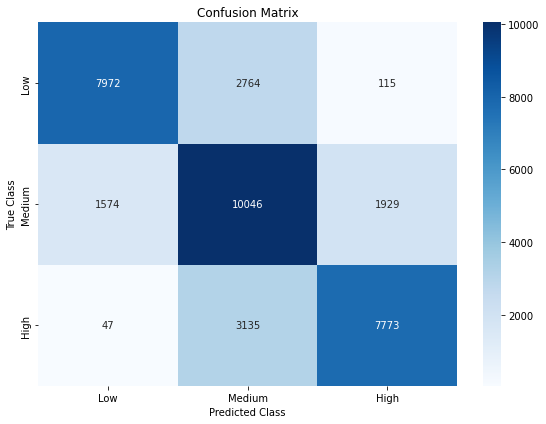

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

y_pred_reg = xgb_model.predict(X_test)  # Regression predictions
predicted_classes = np.array([map_to_class(pred) for pred in y_pred_reg])

true_classes = np.array([map_to_class(val) for val in y_test])

# Classification metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted', zero_division=0)
recall = recall_score(true_classes, predicted_classes, average='weighted', zero_division=0)
f1 = f1_score(true_classes, predicted_classes, average='weighted', zero_division=0)

print(f"\nClassification Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=['Low', 'Medium', 'High']))

conf_matrix = confusion_matrix(true_classes, predicted_classes, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.tight_layout()
plt.show()

In [44]:
y_pred_reg = xgb_model.predict(X)  # Regression predictions
predicted_classes = np.array([map_to_class(pred) for pred in y_pred_reg])


print(predicted_classes)

# Get only data with High predicted class
mask = predicted_classes == 'High'

# Filter both arrays using the mask
filtered_X_test = X[mask]
filtered_predicted_classes = predicted_classes[mask]

print(filtered_X_test)
print(filtered_predicted_classes)

['High' 'High' 'High' ... 'Medium' 'Low' 'Medium']
        popularity  acousticness  duration_ms  energy  instrumentalness  key  \
0             1.00        0.5780       178640  0.3210         -0.000775    1   
1             0.99        0.1630       149520  0.5390         -0.000752   11   
2             0.99        0.0421       190440  0.5540         -0.000775    5   
3             0.98        0.1100       193227  0.8600         -0.000754    8   
4             0.97        0.0691       187436  0.7040         -0.000775    1   
...            ...           ...          ...     ...               ...  ...   
176718        0.00        0.9470        50879  0.0111          0.001416   11   
176727        0.00        0.4920        65400  0.1060         -0.000775    1   
176753        0.00        0.9580       152667  0.2810         -0.000728    4   
176755        0.00        0.7810        81533  0.1760         -0.000775    2   
176758        0.00        0.9900        29707  0.4840         -0.0007

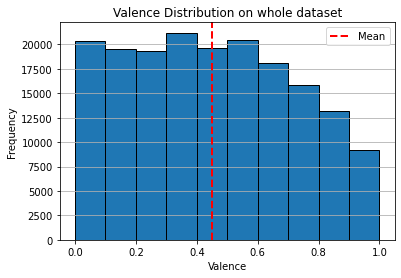

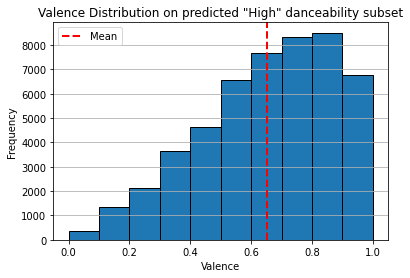

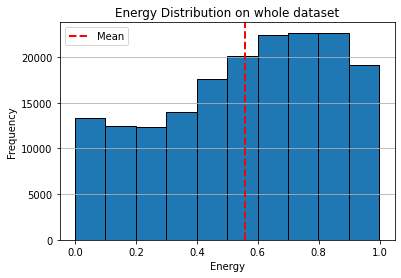

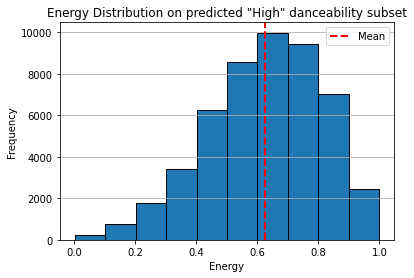

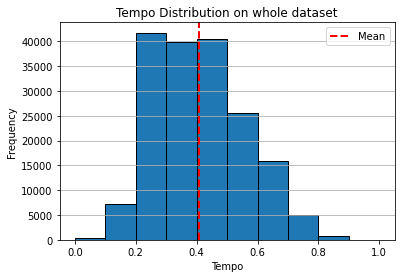

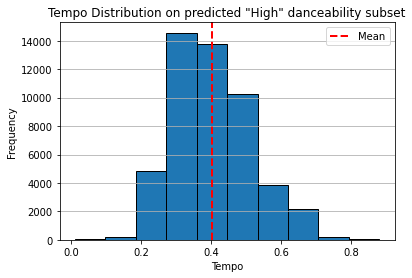

In [45]:
def plot_histogram_with_average(data, title, xlabel, ylabel, bins=10, edgecolor='black'):
  """
  Plots a histogram with a vertical line representing the average.

  Args:
      data: The data to be plotted as a histogram.
      title: The title of the plot.
      xlabel: The label for the x-axis.
      ylabel: The label for the y-axis.
      bins: The number of bins to use for the histogram (default: 10).
      edgecolor: The color of the edges of the bars in the histogram (default: 'black').
  """
  plt.hist(data, bins=bins, edgecolor=edgecolor)  # Plot the histogram

  # Calculate the average (ignoring potential NaNs)
  average = np.nanmean(data)

  # Add the vertical line for the average
  plt.axvline(x=average, color='red', linestyle='dashed', linewidth=2, label='Mean')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid(axis='y')
  plt.legend()  # Add legend for the average line
  plt.show()

# Use the function for each histogram plot
plot_histogram_with_average(X['valence'], 'Valence Distribution on whole dataset', 'Valence', 'Frequency')
plot_histogram_with_average(filtered_X_test['valence'], 'Valence Distribution on predicted "High" danceability subset', 'Valence', 'Frequency')
plot_histogram_with_average(X['energy'], 'Energy Distribution on whole dataset', 'Energy', 'Frequency')
plot_histogram_with_average(filtered_X_test['energy'], 'Energy Distribution on predicted "High" danceability subset', 'Energy', 'Frequency')
plot_histogram_with_average(X['tempo'], 'Tempo Distribution on whole dataset', 'Tempo', 'Frequency')
plot_histogram_with_average(filtered_X_test['tempo'], 'Tempo Distribution on predicted "High" danceability subset', 'Tempo', 'Frequency')


In [46]:
df_ = pd.read_csv("dataset.csv")
tempo_min = df_['tempo'].min()  # Replace df['tempo'] with your actual data
tempo_max = df_['tempo'].max()
# Calculate normalized values
normalized_90 = (90 - tempo_min) / (tempo_max - tempo_min)
normalized_130 = (130 - tempo_min) / (tempo_max - tempo_min)

print(f"Normalized 90 BPM: {normalized_90:.3f}")
print(f"Normalized 130 BPM: {normalized_130:.3f}")

Normalized 90 BPM: 0.370
Normalized 130 BPM: 0.534


In [47]:
optimal_tempo_whole_set = df[(df["tempo"] > normalized_90) & (df["tempo"] < normalized_130)]
optimal_tempo_high_set = filtered_X_test[(filtered_X_test["tempo"] > normalized_90) & (filtered_X_test["tempo"] < normalized_130)]

def get_percentage(class_name):

    # Get only data with High predicted class
    mask = predicted_classes == class_name

    # Filter both arrays using the mask
    filtered_X_test = X[mask]
    return len(optimal_tempo_high_set) / len(filtered_X_test) * 100

print(f"Percentage of optimal tempo music in whole dataset: {len(optimal_tempo_whole_set) / len(df) * 100:.2f}%\n")

for i in ["Low", "Medium", "High"]:
    perc = get_percentage(i)
    print(f"Percentage of optimal tempo music in {i} dataset: {perc:.2f}%")

Percentage of optimal tempo music in whole dataset: 35.80%

Percentage of optimal tempo music in Low dataset: 48.18%
Percentage of optimal tempo music in Medium dataset: 28.71%
Percentage of optimal tempo music in High dataset: 45.66%


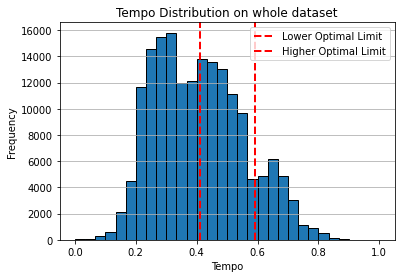

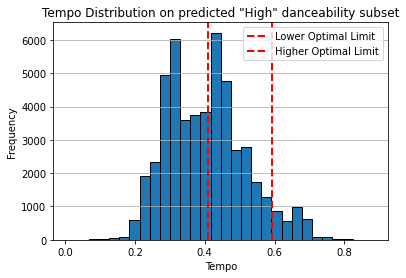

In [48]:
def plot_histogram_with_average(data, title, xlabel, ylabel, bins=30, edgecolor='black'):
  """
  Plots a histogram with a vertical line representing the average.

  Args:
      data: The data to be plotted as a histogram.
      title: The title of the plot.
      xlabel: The label for the x-axis.
      ylabel: The label for the y-axis.
      bins: The number of bins to use for the histogram (default: 10).
      edgecolor: The color of the edges of the bars in the histogram (default: 'black').
  """
  plt.hist(data, bins=bins, edgecolor=edgecolor)  # Plot the histogram

  # Calculate the average (ignoring potential NaNs)
  low = 0.410
  high = 0.592

  # Add the vertical line for the average
  plt.axvline(x=low, color='red', linestyle='dashed', linewidth=2, label='Lower Optimal Limit')
#   plt.axvline(x=average, color='red', linestyle='dashed', linewidth=2, label='Mean')
  plt.axvline(x=high, color='red', linestyle='dashed', linewidth=2, label='Higher Optimal Limit')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.grid(axis='y')
  plt.legend()  # Add legend for the average line
  plt.show()

# Use the function for each histogram plot
plot_histogram_with_average(X['tempo'], 'Tempo Distribution on whole dataset', 'Tempo', 'Frequency')
plot_histogram_with_average(filtered_X_test['tempo'], 'Tempo Distribution on predicted "High" danceability subset', 'Tempo', 'Frequency')


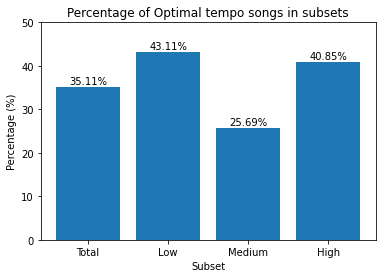

In [49]:
import matplotlib.pyplot as plt

# Define data as percentages
data = [35.11, 43.11, 25.69, 40.85]
labels = ['Total', 'Low', 'Medium', 'High']

# Create the histogram
plt.bar(labels, data)

# Set the y-axis limit to 50%
plt.ylim(0, 50)

# Add a title and labels
plt.title("Percentage of Optimal tempo songs in subsets")
plt.xlabel("Subset")
plt.ylabel("Percentage (%)")

# Display percentages on top of bars (optional)
for i, v in enumerate(data):
  plt.text(i, v + 0.2, f"{v:.2f}%", ha='center', va='bottom')

# Show the plot
plt.show()